In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [ ]:
data =pd.read_csv("/content/new dataset.csv")
data.head()

,Brand Name,Battery Capacity,Range,Num of Seats,Charging T,Price,TopSpeed,Transmission
0,Audi RS e-tron GT,93,480,5,9,204,250,Automatic
1,Audi e-tron GT,93,500,5,9,179,245,Automatic
2,Audi e-tron,95,484,5,9,123,200,Automatic
3,Tata Nexon EV,30,312,5,9,17,180,Automatic
4,Tata Tigor EV,26,306,5,9,14,120,Automatic


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand Name        18 non-null     object
 1   Battery Capacity  18 non-null     int64 
 2   Range             18 non-null     int64 
 3   Num of Seats      18 non-null     int64 
 4   Charging T        18 non-null     int64 
 5   Price             18 non-null     int64 
 6   TopSpeed          18 non-null     int64 
 7   Transmission      18 non-null     object
dtypes: int64(6), object(2)
memory usage: 1.2+ KB


In [ ]:
print(pd.isnull(data).sum())

Brand Name          0
Battery Capacity    0
Range               0
Num of Seats        0
Charging T          0
Price               0
TopSpeed            0
Transmission        0
dtype: int64


In [ ]:
data.columns

Index(['Brand Name', 'Battery Capacity', 'Range', 'Num of Seats', 'Charging T',
       'Price', 'TopSpeed', 'Transmission'],
      dtype='object')

In [ ]:
data.describe(include='all')

,Brand Name,Battery Capacity,Range,Num of Seats,Charging T,Price,TopSpeed,Transmission
count,18,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18
unique,18,NaN,NaN,NaN,NaN,NaN,NaN,1
top,Audi RS e-tron GT,NaN,NaN,NaN,NaN,NaN,NaN,Automatic
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,18
mean,NaN,62.277778,396.944444,4.944444,15.666667,75.111111,180.888889,NaN
std,NaN,28.725487,116.619276,0.235702,11.591072,63.751253,56.527858,NaN
min,NaN,10.000000,100.000000,4.000000,7.000000,9.000000,80.000000,NaN
25%,NaN,39.250000,358.500000,5.000000,9.000000,18.500000,128.750000,NaN
50%,NaN,71.000000,434.000000,5.000000,9.500000,64.500000,190.000000,NaN
75%,NaN,87.500000,477.750000,5.000000,19.000000,114.250000,233.750000,NaN


In [ ]:
data_modified = data.replace({'Yes': 1, "No": 0})
data_modified

,Brand Name,Battery Capacity,Range,Num of Seats,Charging T,Price,TopSpeed,Transmission
0,Audi RS e-tron GT,93,480,5,9,204,250,Automatic
1,Audi e-tron GT,93,500,5,9,179,245,Automatic
2,Audi e-tron,95,484,5,9,123,200,Automatic
3,Tata Nexon EV,30,312,5,9,17,180,Automatic
4,Tata Tigor EV,26,306,5,9,14,120,Automatic
5,Hyudai Kona Electric,39,452,5,7,24,155,Automatic
6,Jaguar I-Pace,90,470,5,13,112,200,Automatic
7,Mahindra eVerito,21,140,5,12,10,86,Automatic
8,MG ZS EV,44,340,5,8,25,120,Automatic
9,Mercedes Benz EQC,80,414,5,21,100,180,Automatic


In [ ]:
print('Brand Name')
print(data_modified['Brand Name'].value_counts())
print('Transmission')
print(data_modified['Transmission'].value_counts())

Brand Name
Audi RS e-tron GT        1
Audi e-tron GT           1
Porsche Taycan           1
BMW iX                   1
Mercedes-Benz EQC        1
BYD E6                   1
Hyundai Kona Electric    1
Tata Nexon EV Max        1
Mahindra e2op4/p6        1
Mercedes Benz EQC        1
MG ZS EV                 1
Mahindra eVerito         1
Jaguar I-Pace            1
Hyudai Kona Electric     1
Tata Tigor EV            1
Tata Nexon EV            1
Audi e-tron              1
Audi E-Tron              1
Name: Brand Name, dtype: int64
Transmission
Automatic    18
Name: Transmission, dtype: int64


In [ ]:
data_modified['Transmission'] = data_modified['Transmission'].astype('category')
data_modified['Transmission'] = data_modified['Transmission'].cat.codes

data_modified['Brand Name'] = data_modified['Brand Name'].astype('category')
data_modified['Brand Name'] = data_modified['Brand Name'].cat.codes

In [ ]:
data_modified

,Brand Name,Battery Capacity,Range,Num of Seats,Charging T,Price,TopSpeed,Transmission
0,1,12,13,5,9,16,250,0
1,3,12,15,5,9,15,245,0
2,2,13,14,5,9,13,200,0
3,15,3,3,5,9,3,180,0
4,17,2,2,5,9,2,120,0
5,6,4,10,5,7,5,155,0
6,8,11,11,5,13,11,200,0
7,11,1,1,5,12,1,86,0
8,9,6,4,5,8,6,120,0
9,12,10,5,5,21,9,180,0


In [ ]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Brand Name        18 non-null     int8 
 1   Battery Capacity  18 non-null     int8 
 2   Range             18 non-null     int8 
 3   Num of Seats      18 non-null     int64
 4   Charging T        18 non-null     int64
 5   Price             18 non-null     int8 
 6   TopSpeed          18 non-null     int64
 7   Transmission      18 non-null     int8 
dtypes: int64(3), int8(5)
memory usage: 650.0 bytes


In [ ]:
data_modified.isna().sum()

Brand Name          0
Battery Capacity    0
Range               0
Num of Seats        0
Charging T          0
Price               0
TopSpeed            0
Transmission        0
dtype: int64

In [ ]:
data_modified.corr()

,Brand Name,Battery Capacity,Range,Num of Seats,Charging T,Price,TopSpeed,Transmission
Brand Name,1.000000,-0.610112,-0.602053,-0.070122,-0.125481,-0.580592,-0.262173,NaN
Battery Capacity,-0.610112,1.000000,0.813185,0.443417,0.431999,0.886650,0.669799,NaN
Range,-0.602053,0.813185,1.000000,0.415259,0.266335,0.668850,0.704295,NaN
Num of Seats,-0.070122,0.443417,0.415259,1.000000,0.165071,0.382479,0.445418,NaN
Charging T,-0.125481,0.431999,0.266335,0.165071,1.000000,0.177599,0.037377,NaN
Price,-0.580592,0.886650,0.668850,0.382479,0.177599,1.000000,0.734691,NaN
TopSpeed,-0.262173,0.669799,0.704295,0.445418,0.037377,0.734691,1.000000,NaN
Transmission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


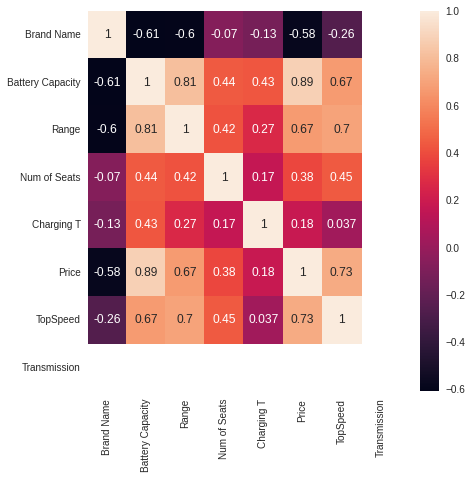

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(data_modified.corr(), annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


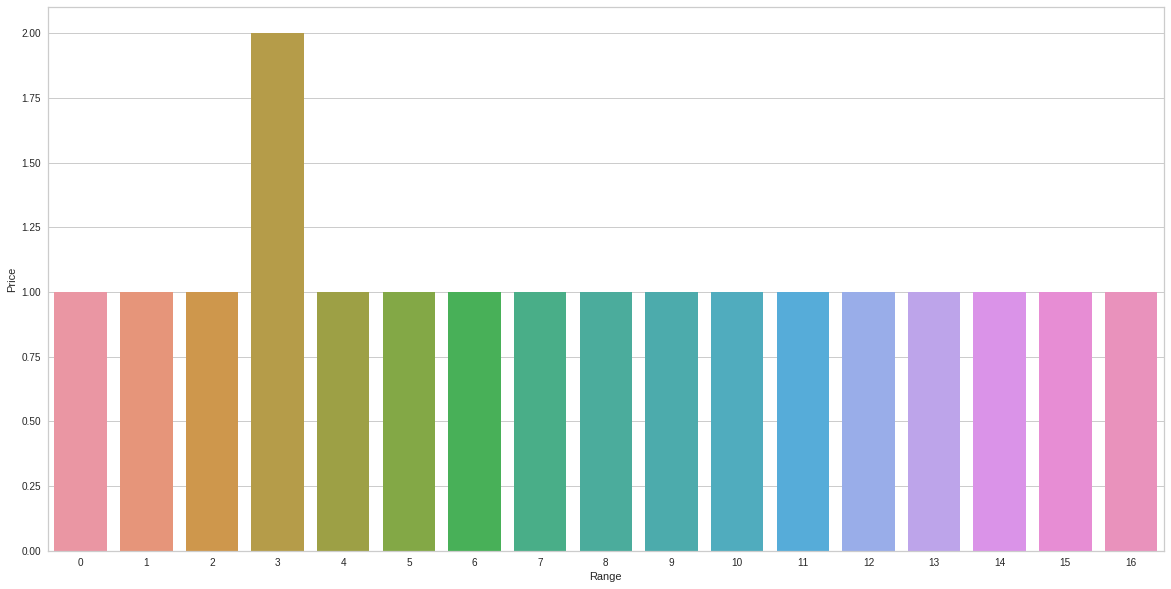

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data_modified.Price)
plt.xlabel("Range")
plt.ylabel("Price")
plt.show()

In [ ]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Brand Name        18 non-null     int8 
 1   Battery Capacity  18 non-null     int8 
 2   Range             18 non-null     int8 
 3   Num of Seats      18 non-null     int64
 4   Charging T        18 non-null     int64
 5   Price             18 non-null     int8 
 6   TopSpeed          18 non-null     int64
 7   Transmission      18 non-null     int8 
 8   cluster_number    18 non-null     int32
dtypes: int32(1), int64(3), int8(5)
memory usage: 722.0 bytes


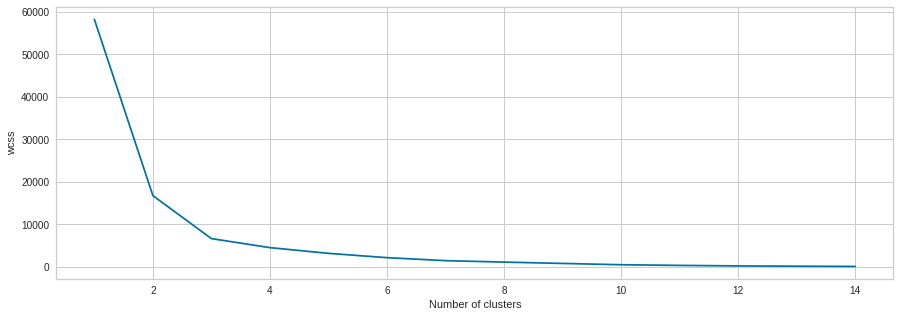

In [ ]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_modified)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [68]:
data_modified

,Brand Name,Battery Capacity,Range,Num of Seats,Charging T,Price,TopSpeed,Transmission,cluster_number
0,1,12,13,5,9,16,250,0,2
1,3,12,15,5,9,15,245,0,2
2,2,13,14,5,9,13,200,0,0
3,15,3,3,5,9,3,180,0,0
4,17,2,2,5,9,2,120,0,1
5,6,4,10,5,7,5,155,0,1
6,8,11,11,5,13,11,200,0,0
7,11,1,1,5,12,1,86,0,3
8,9,6,4,5,8,6,120,0,1
9,12,10,5,5,21,9,180,0,0


In [77]:
kmeans = KMeans(4, init = 'k-means++', random_state=42).fit(data_modified)
data_modified['cluster_number'] = kmeans.labels_

In [78]:
data_modified

,Brand Name,Battery Capacity,Range,Num of Seats,Charging T,Price,TopSpeed,Transmission,cluster_number
0,1,12,13,5,9,16,250,0,2
1,3,12,15,5,9,15,245,0,2
2,2,13,14,5,9,13,200,0,0
3,15,3,3,5,9,3,180,0,0
4,17,2,2,5,9,2,120,0,1
5,6,4,10,5,7,5,155,0,1
6,8,11,11,5,13,11,200,0,0
7,11,1,1,5,12,1,86,0,3
8,9,6,4,5,8,6,120,0,1
9,12,10,5,5,21,9,180,0,0


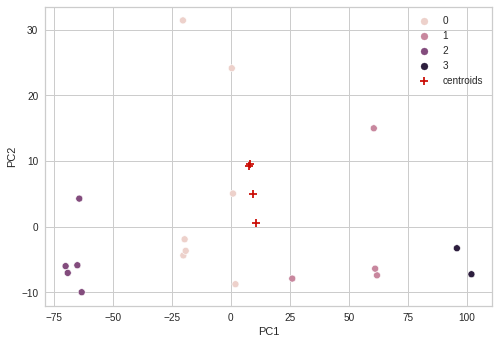

In [79]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

x = data_modified.values
pca = preprocessing.scale(x)
pca = PCA(n_components=8)
pca = pca.fit_transform(x)

pf = pd.DataFrame(data=pca, columns=[f"PC{i+1}" for i in range(8)])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', c="r", s=50, label='centroids')
plt.legend()
plt.show()

In [82]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

cross = pd.crosstab(data_modified['cluster_number'], data_modified['Brand Name'])
cross = cross[list(np.arange(11))]
cross

Brand Name,0,1,2,3,4,5,6,7,8,9,10
cluster_number,,,,,,,,,,,
0,1,0,1,0,0,0,0,1,1,0,0
1,0,0,0,0,0,1,1,0,0,1,0
2,0,1,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1


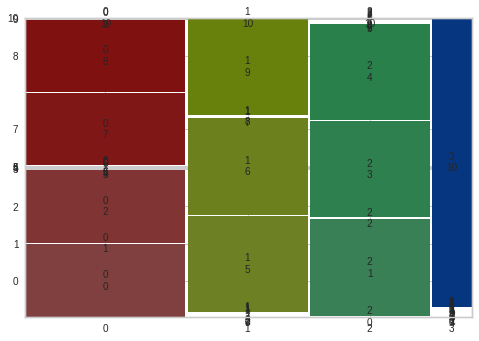

In [83]:
mosaic(cross.stack())
plt.show()

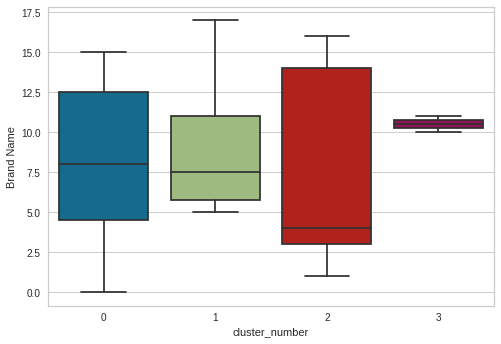

In [84]:
sns.boxplot(x='cluster_number', y='Brand Name', data=data_modified)

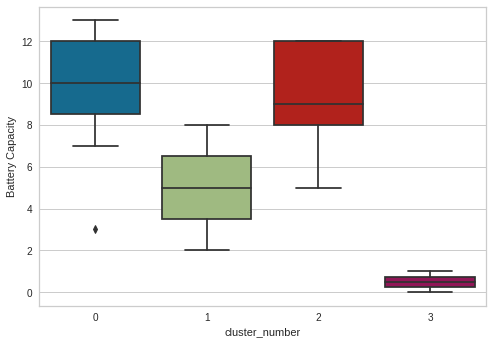

In [85]:
sns.boxplot(x='cluster_number', y='Battery Capacity', data=data_modified)